# Extract images from PDF

In [1]:
!pip install PyMuPDF Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 78.1 MB/s eta 0:00:00


In [2]:
import os
import fitz  # PyMuPDF
import io
from PIL import Image

# Output directory for the extracted images
output_dir = "images"
# Desired output image format
output_format = "png"
# Minimum width and height for extracted images
min_width = 16
min_height = 16
# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
!wget https://github.com/smmss79/DIP_2023/raw/main/HW3/DIP140102_HW3.pdf

--2023-05-01 11:09:53--  https://github.com/smmss79/DIP_2023/raw/main/HW3/DIP140102_HW3.pdf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW3/DIP140102_HW3.pdf [following]
--2023-05-01 11:09:53--  https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW3/DIP140102_HW3.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75225 (73K) [application/octet-stream]
Saving to: ‘DIP140102_HW3.pdf’

DIP140102_HW3.pdf   100%[===================>]  73.46K  --.-KB/s    in 0.005s  

2023-05-01 11:09:54 (15.7 MB/s) - ‘DIP140102_HW3.pdf’ saved [75225/75225]



In [5]:
# file path you want to extract images from
file = "/content/DIP140102_HW3.pdf"
# open the file
pdf_file = fitz.open(file)


# Iterate over PDF pages
for page_index in range(len(pdf_file)):
    # Get the page itself
    page = pdf_file[page_index]
    # Get image list
    image_list = page.get_images(full=True)
    # Print the number of images found on this page
    if image_list:
        print(f"[+] Found a total of {len(image_list)} images in page {page_index}")
    else:
        print(f"[!] No images found on page {page_index}")
    # Iterate over the images on the page
    for image_index, img in enumerate(image_list, start=1):
        # Get the XREF of the image
        xref = img[0]
        # Extract the image bytes
        base_image = pdf_file.extract_image(xref)
        image_bytes = base_image["image"]
        # Get the image extension
        image_ext = base_image["ext"]
        # Load it to PIL
        image = Image.open(io.BytesIO(image_bytes))
        # Check if the image meets the minimum dimensions and save it
        if image.width >= min_width and image.height >= min_height:
            image.save(
                open(os.path.join(output_dir, f"image{page_index + 1}_{image_index}.{output_format}"), "wb"),
                format=output_format.upper())
        else:
            print(f"[-] Skipping image {image_index} on page {page_index} due to its small size.")

[+] Found a total of 2 images in page 0


# سوال اول

تصویر زیر را در نظر بگیرید و به آن سه نوع نویز نمک و فلفل، گوسین و نویز ضربه ای اضافه نمائید، برنامه ای بنویسید
که به طور اتوماتیک نوع نویز تصویر را مشخص نماید؟ 

## Visualization

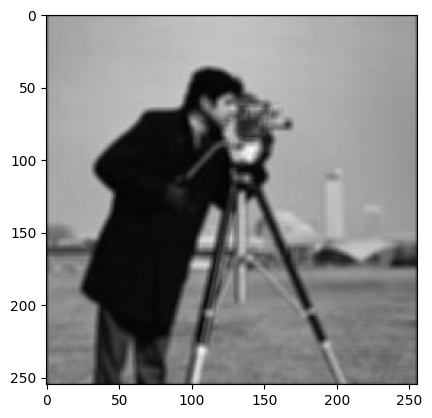

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


IMAGE1_PATH ="/content/images/image1_1.png"
image1 = cv2.imread(IMAGE1_PATH,0)
plt.imshow(image1,cmap = "gray")
plt.show()

# Add noise to image

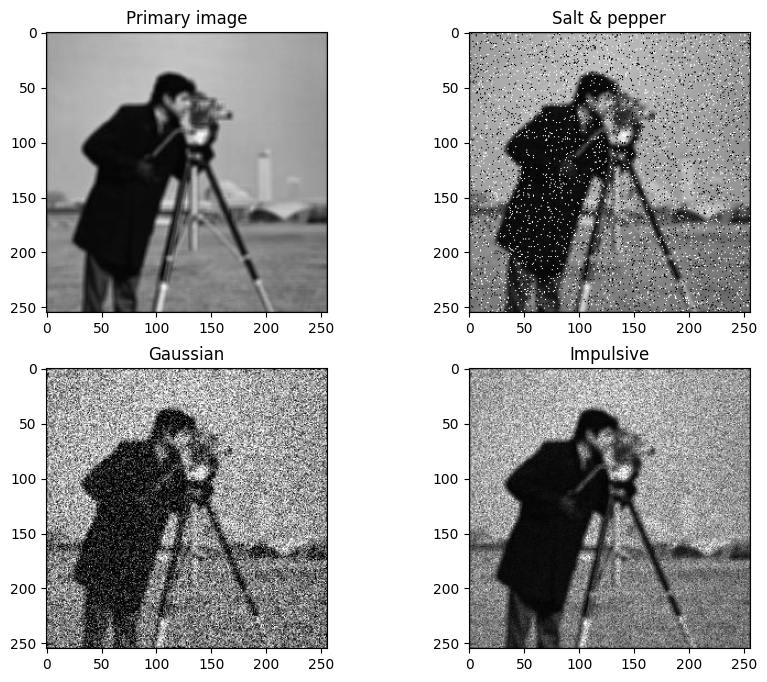

In [63]:
from skimage.util import random_noise

noise_salt_pepper = random_noise(image=image1,
                      mode='s&p',
                      amount=0.1,
                      seed=42)

noise_gaussian = random_noise(image=image1,
                      mode='gaussian',
                      mean=0,
                      var=0.05,
                      seed=42)

noise_impulsive = random_noise(image=image1,
                      mode='speckle',
                      mean=0,
                      var=0.05,
                      seed=42)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Primary image")
plt.imshow(image1,cmap="gray")

plt.subplot(2,2,2)
plt.title("Salt & pepper")
plt.imshow(noise_salt_pepper,cmap="gray")

plt.subplot(2,2,3)
plt.title("Gaussian")
plt.imshow(noise_gaussian,cmap="gray")

plt.subplot(2,2,4)
plt.title("Impulsive")
plt.imshow(noise_impulsive,cmap="gray")

plt.show()

## Noise Detection with histogram (uncomplete)

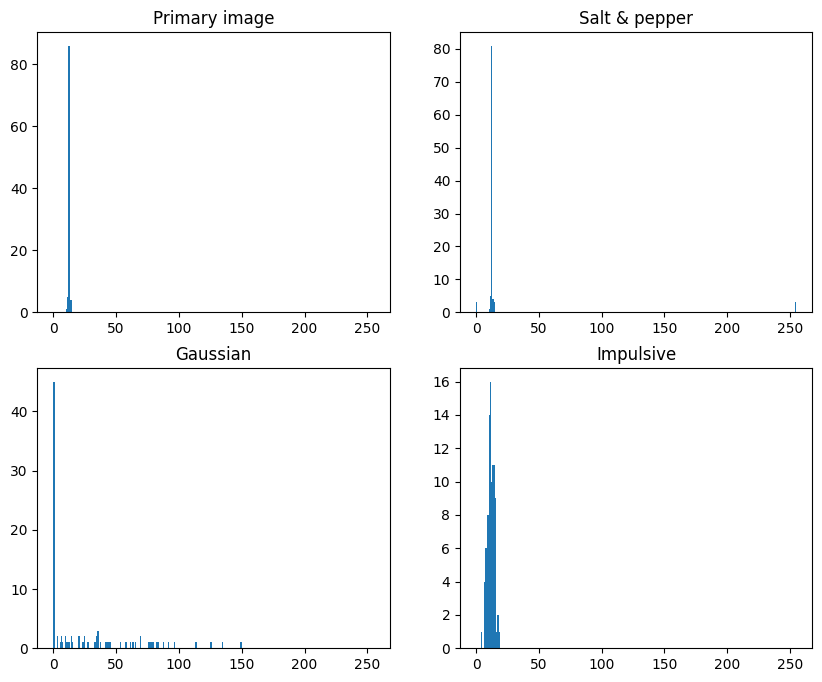

In [82]:
plt.figure(figsize=(10,8))

bins = range(256)

plt.subplot(2,2,1)
plt.title("Primary image")
n1,_,_ = plt.hist(image1[150:160,50:60].ravel(),bins=bins)

plt.subplot(2,2,2)
plt.title("Salt & pepper")
n_sp,_,_ = plt.hist(noise_salt_pepper[150:160,50:60].ravel()*255,bins=bins)


plt.subplot(2,2,3)
plt.title("Gaussian")
n_gs,_,_ = plt.hist(noise_gaussian[150:160,50:60].ravel()*255,bins=bins)

plt.subplot(2,2,4)
plt.title("Impulsive")
n_im,_,_ = plt.hist(noise_impulsive[150:160,50:60].ravel()*255,bins=bins)

plt.show()


In [91]:
sp = n_sp - n1
print(
max( ( sp)[1:-2]),
max(sp),
sp.var()
)

0.0 3.0 0.17254901960784313
